# Days 51-53 期中考

In [1]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc

import pandas as pd
import seaborn as sns
import numpy as np

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head(3)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0


In [2]:
train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [3]:
train.shape, test.shape

((113, 22), (33, 21))

In [4]:
df = pd.concat([train, test], join='outer', ignore_index=True)

C:\Users\christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## 處理不必要的 features

In [5]:
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
name                           0
other                         53
poi                           33
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [6]:
df = df.drop(['name'], axis=1)
df = df.drop(['email_address'], axis=1)
count = 2
for i in df.columns[df.isnull().sum() > 90]:
    df = df.drop([i], axis=1)
    count += 1
print('Delete {} features'.format(count))

Delete 7 features


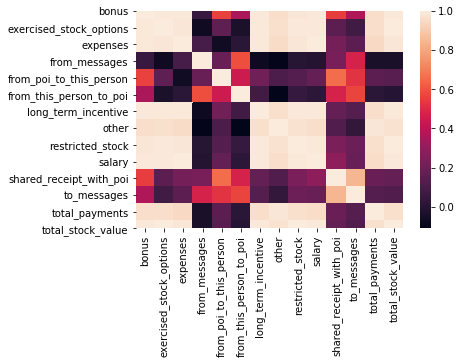

In [7]:
sns.heatmap(df.corr())

In [8]:
df['poi'] = df['poi'].astype(float)

In [9]:
df[df['poi'].notnull()].corr()['poi'].sort_values()

from_messages             -0.126760
from_this_person_to_poi   -0.096864
to_messages               -0.023047
shared_receipt_with_poi    0.120467
from_poi_to_this_person    0.127932
expenses                   0.136386
other                      0.225619
long_term_incentive        0.227805
bonus                      0.242170
restricted_stock           0.261102
total_payments             0.271335
salary                     0.371917
total_stock_value          0.443098
exercised_stock_options    0.591972
poi                        1.000000
Name: poi, dtype: float64

In [10]:
count = 0
drop_features = df.columns[abs(df[df['poi'].notnull()].corr()['poi']) < .2]
for i in drop_features:
    df = df.drop([i], axis=1)
    count += 1
print('Delete {} features'.format(count))

Delete 6 features


In [11]:
class RandomForestImputer():
    def __init__(self, df, feature, threshold):
        self.feature = feature
        self.model = RandomForestRegressor()
        self.predict_feature = list(df.columns[abs(df.corr()[self.feature]) > threshold])
        if 'poi' in self.predict_feature:
            self.predict_feature.remove('poi')
        df1 = df[self.predict_feature].dropna(axis=0)
        
        self.model.fit(df1.drop([self.feature], axis=1), df1[self.feature])
        print('Score:', self.model.score(df1.drop([self.feature], axis=1), df1[self.feature]))
    def predict(self, df):
        def feature_fillna(row):
            if np.isnan(row[self.feature]):
                row[self.feature] = self.model.predict([row[self.predict_feature].drop(labels=[self.feature]).fillna(0)])
            return row
        print('Impute {} data'.format(df[self.feature].isnull().sum()))
        return df.apply(feature_fillna, axis=1)

## 處理特殊人物

In [12]:
l = []
cols = list(df.columns)
cols.remove('poi')

for i in cols:
    l += list(df.sort_values(i, ascending=False).head(5).index)
for i in set(l):
    print(i, l.count(i))

0 1
33 3
1 5
133 8
5 2
71 1
8 8
42 2
139 1
78 2
110 1
48 1
113 1
119 3
58 1


In [13]:
l = pd.Series(list(set(l)))
special_people_train = df.loc[l[l < 112]]
special_people_test = df.loc[l[l > 112]]
df = df.drop(l)

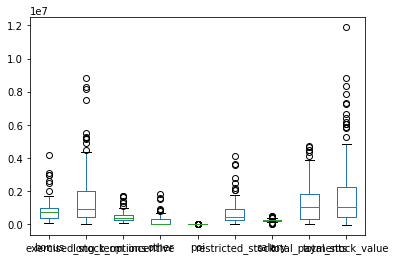

In [14]:
df.plot(kind='box')

## 處理離群值與缺失值

### 處理 bonus

In [15]:
df.corr()['bonus'].sort_values()

poi                       -0.006915
other                      0.035927
exercised_stock_options    0.038327
total_stock_value          0.147494
restricted_stock           0.223406
long_term_incentive        0.302887
salary                     0.388836
total_payments             0.823314
bonus                      1.000000
Name: bonus, dtype: float64

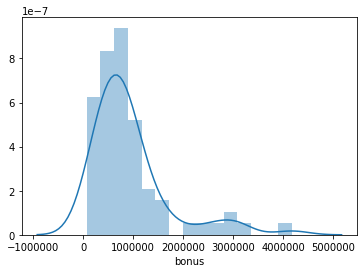

In [16]:
sns.distplot(df['bonus'].dropna())

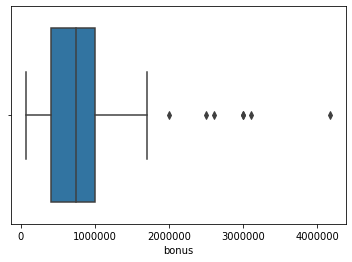

In [17]:
sns.boxplot(df['bonus'].dropna())

In [18]:
#df.loc[df.query('bonus > 3e6').index, 'bonus'] = np.nan

In [19]:
model = RandomForestImputer(df, 'bonus', .1)

Score: 0.9415966138139348


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 0 data
Impute 2 data
Impute 1 data


### 處理 exercised_stock_options

In [22]:
df.corr()['exercised_stock_options'].sort_values()

salary                    -0.099291
total_payments            -0.042468
bonus                     -0.010391
other                      0.044931
poi                        0.145951
long_term_incentive        0.147143
restricted_stock           0.444687
total_stock_value          0.950155
exercised_stock_options    1.000000
Name: exercised_stock_options, dtype: float64

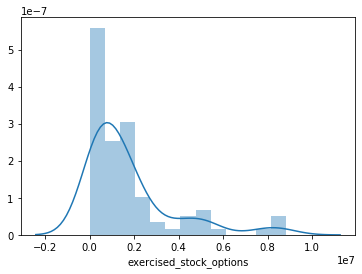

In [23]:
sns.distplot(df['exercised_stock_options'].dropna())

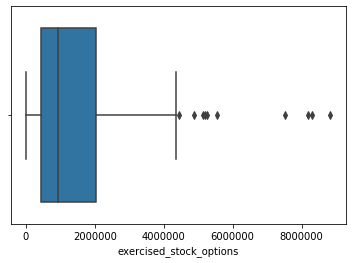

In [24]:
sns.boxplot(df['exercised_stock_options'].dropna())

In [25]:
#df.loc[df.query('exercised_stock_options > 1e7').index, 'exercised_stock_options'] = np.nan

In [26]:
model = RandomForestImputer(df, 'exercised_stock_options', .1)

Score: 0.9821852114208198


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 44 data
Impute 0 data
Impute 0 data


### 處理 long_term_incentive

In [28]:
df.corr()['long_term_incentive'].sort_values()

other                     -0.075639
restricted_stock           0.047560
total_stock_value          0.088402
poi                        0.115533
exercised_stock_options    0.122473
bonus                      0.334444
salary                     0.337528
total_payments             0.456531
long_term_incentive        1.000000
Name: long_term_incentive, dtype: float64

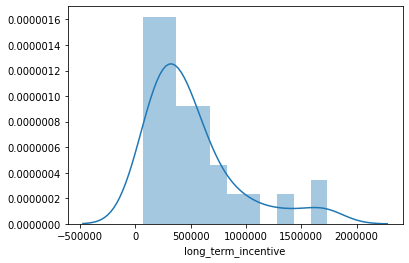

In [29]:
sns.distplot(df['long_term_incentive'].dropna())

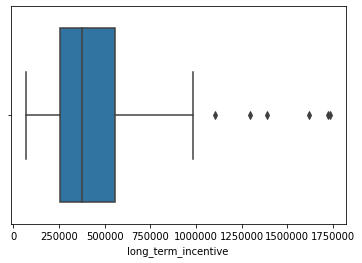

In [30]:
sns.boxplot(df['long_term_incentive'].dropna())

In [31]:
#df.loc[df.query('long_term_incentive > 2e6').index, 'long_term_incentive'] = np.nan

In [32]:
model = RandomForestImputer(df, 'long_term_incentive', .1)

Score: 0.7622219654614191


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 74 data
Impute 4 data
Impute 2 data


### 處理 other

In [34]:
df.corr()['other'].sort_values()

salary                    -0.126608
long_term_incentive       -0.044265
bonus                     -0.012090
exercised_stock_options    0.052436
total_stock_value          0.152573
poi                        0.214206
total_payments             0.233046
restricted_stock           0.299541
other                      1.000000
Name: other, dtype: float64

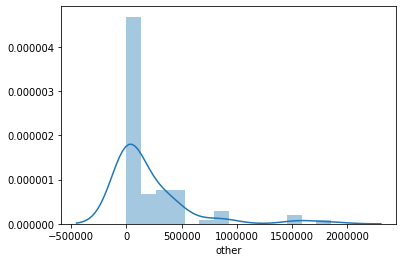

In [35]:
sns.distplot(df['other'].dropna())

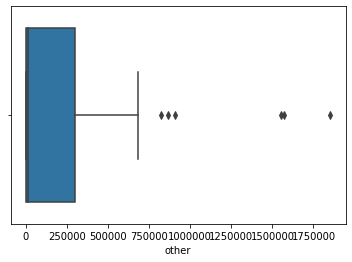

In [36]:
sns.boxplot(df['other'].dropna())

In [37]:
#df.loc[df.query('other > 4e6').index, 'other'] = np.nan

In [38]:
model = RandomForestImputer(df, 'other', .1)

Score: 0.6769364299634534


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 52 data
Impute 1 data
Impute 0 data


### 處理 restricted_stock

In [40]:
df.corr()['restricted_stock'].sort_values()

long_term_incentive        0.043148
total_payments             0.128905
bonus                      0.150097
poi                        0.168394
salary                     0.200255
other                      0.261528
exercised_stock_options    0.443049
total_stock_value          0.662897
restricted_stock           1.000000
Name: restricted_stock, dtype: float64

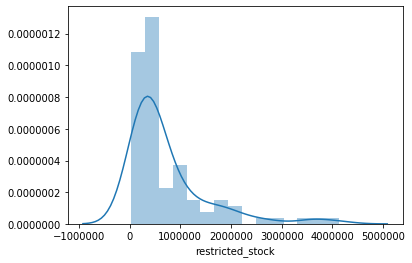

In [41]:
sns.distplot(df['restricted_stock'].dropna())

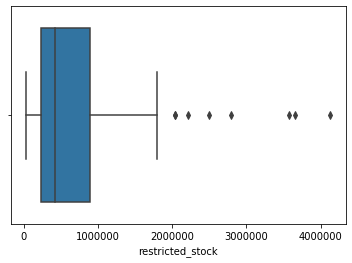

In [42]:
sns.boxplot(df['restricted_stock'].dropna())

In [43]:
#df.loc[df.query('restricted_stock > 4e7').index, 'restricted_stock'] = np.nan

In [44]:
df.query('restricted_stock < 0')['restricted_stock']

Series([], Name: restricted_stock, dtype: float64)

In [45]:
df['restricted_stock'] = abs(df['restricted_stock'])

In [46]:
model = RandomForestImputer(df, 'restricted_stock', .1)

Score: 0.8341405042031952


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 33 data
Impute 3 data
Impute 0 data


### 處理 salary

In [48]:
df.corr()['salary'].sort_values()

other                     -0.122664
exercised_stock_options   -0.044208
total_stock_value         -0.006600
poi                        0.126596
restricted_stock           0.207943
long_term_incentive        0.235500
bonus                      0.394258
total_payments             0.444342
salary                     1.000000
Name: salary, dtype: float64

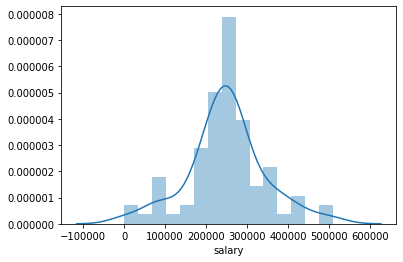

In [49]:
sns.distplot(df['salary'].dropna())

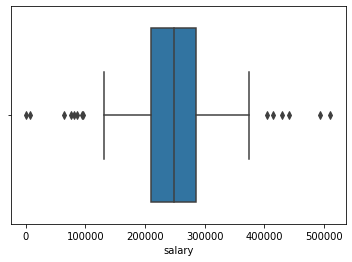

In [50]:
sns.boxplot(df['salary'].dropna())

In [51]:
#df.loc[df.query('salary > 2e7').index, 'salary'] = np.nan

In [52]:
model = RandomForestImputer(df, 'salary', .1)

Score: 0.8452931914941576


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 49 data
Impute 1 data
Impute 1 data


### 處理 total_payments

In [54]:
df.corr()['total_payments'].sort_values()

total_stock_value          0.069068
exercised_stock_options    0.085050
other                      0.093121
long_term_incentive        0.133013
poi                        0.134461
restricted_stock           0.202724
salary                     0.463448
bonus                      0.723433
total_payments             1.000000
Name: total_payments, dtype: float64

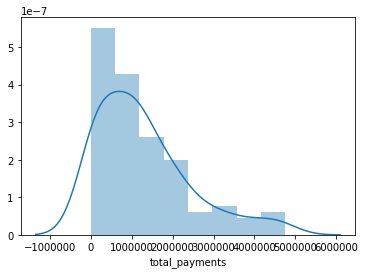

In [55]:
sns.distplot(df['total_payments'].dropna())

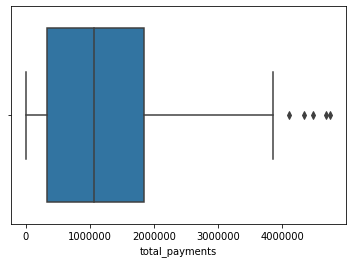

In [56]:
sns.boxplot(df['total_payments'].dropna())

In [57]:
#df.loc[df.query('total_payments > 2e7').index, 'total_payments'] = np.nan

In [58]:
model = RandomForestImputer(df, 'total_payments', .1)

Score: 0.9533725014888221


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 21 data
Impute 0 data
Impute 0 data


### 處理 total_stock_value

In [60]:
df.corr()['total_stock_value'].sort_values()

long_term_incentive        0.065563
bonus                      0.078796
other                      0.086902
salary                     0.093564
poi                        0.102342
total_payments             0.130338
restricted_stock           0.665265
exercised_stock_options    0.953694
total_stock_value          1.000000
Name: total_stock_value, dtype: float64

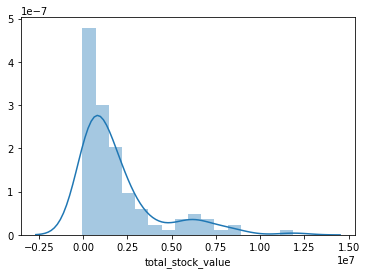

In [61]:
sns.distplot(df['total_stock_value'].dropna())

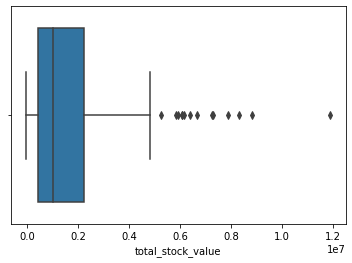

In [62]:
sns.boxplot(df['total_stock_value'].dropna())

In [63]:
#df.loc[df.query('total_stock_value > 2e7').index, 'total_stock_value'] = np.nan

In [64]:
df.query('total_stock_value < 0')['total_stock_value']

50   -44093.0
Name: total_stock_value, dtype: float64

In [65]:
df['total_stock_value'] = abs(df['total_stock_value'])

In [66]:
model = RandomForestImputer(df, 'total_stock_value', .1)

Score: 0.9877910452441204


C:\Users\christine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
df = model.predict(df)
special_people = model.predict(special_people_train);special_people_test  = model.predict(special_people_test)

Impute 19 data
Impute 0 data
Impute 1 data


## 特徵工程

## 模型建立

In [68]:
last_train_score = 0
last_val_score = 0

In [73]:
train_data = df[df['poi'].notnull()].append(special_people_train)
test_data = df[df['poi'].isnull()].append(special_people_test)

x_train, y_train = train_data.drop(['poi'], axis=1), train_data['poi']
x_test = test_data.sort_index().drop(['poi'], axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.1, random_state=1, stratify=y_train)

In [74]:
param_grid = {'max_denph': [2], 'min_child_weight': [2], 'gamma':[1], 'subsample':[.5], 'colsample_bytree':[.5]}

model = XGBClassifier()
grid_model = GridSearchCV(model, param_grid=param_grid, cv=4, scoring='roc_auc')
grid_model.fit(x_train, y_train)

C:\Users\christine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.5], 'gamma': [1],
                         'max_denph': [2], 'min_child_weight': [2],
                         'subsamp

In [75]:
print('    | train | val')

print('last|', last_train_score, '|', last_val_score)

last_train_score = grid_model.score(x_train, y_train)
last_val_score = grid_model.score(x_val, y_val)

print('new |', last_train_score, '|', last_val_score)
print(grid_model.best_params_)

    | train | val
last| 0.8968750000000001 | 0.7
new | 0.8848314606741573 | 1.0
{'colsample_bytree': 0.5, 'gamma': 1, 'max_denph': 2, 'min_child_weight': 2, 'subsample': 0.5}


In [76]:
pred = grid_model.predict_proba(x_test)[:, 0]
ans = pd.DataFrame({'name': test['name'], 'poi': pred})

ans.to_csv('ans.csv', index=False)

In [77]:
pred

array([0.8548988 , 0.8507607 , 0.7530823 , 0.6487476 , 0.7768039 ,
       0.9042146 , 0.6341516 , 0.96526873, 0.9266432 , 0.9207146 ,
       0.6902655 , 0.96526873, 0.9430222 , 0.96526873, 0.7297374 ,
       0.96526873, 0.9193844 , 0.901819  , 0.9490596 , 0.9584485 ,
       0.6341516 , 0.6971544 , 0.9368251 , 0.94373417, 0.9533707 ,
       0.9533707 , 0.79421175, 0.9541372 , 0.9224423 , 0.696779  ,
       0.91218686, 0.93485606, 0.89592856], dtype=float32)